In [974]:
import os
import re
import pandas as pd

## Příprava dat

In [976]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [977]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))
len(df)

47419

In [978]:
df = df.merge(pd.read_parquet(os.path.join("data","cnb_vyber.parquet")), left_index=True, right_index=True, how='inner')

In [979]:
len(df)

43749

In [980]:
df = df[df['rok'] >= 2019]

In [981]:
len(df)

7771

In [982]:
df = df.explode('020_a')

In [983]:
def isbn(x):
    try:
        if len(x.replace('-','')) == 13:
            return str(x.replace('-',''))
    except:
        pass

In [984]:
df['isbn'] = df['020_a'].apply(lambda x: isbn(x))

In [985]:
df[['020_a','isbn']].sample(20)

,020_a,isbn
001,,
nkc20193100419,978-80-907515-0-7,9788090751507
nkc20203261872,978-80-907946-0-3,9788090794603
nkc20233548915,978-80-909036-0-9,9788090903609
nkc20233533720,978-80-908626-5-4,9788090862654
nkc20213305317,978-80-7612-291-8,9788076122918
nkc20203232403,978-80-7547-499-5,9788075474995
nkc20223418785,978-80-7211-604-1,9788072116041
nkc20243586058,978-80-271-1019-3,9788027110193
nkc20193164242,978-80-7376-590-3,9788073765903


In [986]:
odkud = "data_raw/ebooky"

In [987]:
stazene = set([x.split(".")[0] for x in os.listdir(odkud)])
len(stazene)

2732

In [988]:
df = df[df['isbn'].isin(stazene)]

In [989]:
df

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,isbn
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20193076855,2019.0,Vypůjčená minulost,Pischová Naďa,None,190218s2019 xr d 000 f cze d,978-80-7597-336-8,None,[(vázáno)],None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-31, 821-93, (0:82-31)]",[aut],None,"Pischová, Naďa",None,None,Vypůjčená minulost :,Naďa Pischová,None,None,None,[1. vydání],None,None,None,None,None,None,None,[Praha :],"[XYZ,]",[2019],[1],[205 stran ;],None,[19 cm],None,None,None,[Sedmnáctiletá Tereza se díky nalezenému deník...,[Životní zkušenosti se získávají často velmi t...,None,None,None,None,None,None,None,None,None,"[české romány, publikace pro mládež, Czech fic...",None,None,None,None,None,None,None,None,None,[Albatros Media - XYZ],None,cam a22 i 4500,9788075973368
nkc20193162052,2019.0,Čarodějnice,Vostrý Mirek,mzk2018995176,200120s2019 xr g 000 j cze,978-80-88318-05-7,None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-32)]",[aut],mzk2018995176,"Vostrý, Mirek,",1968-,None,Čarodějnice /,Mirek Vostrý,None,None,None,[Vydání první],None,None,None,None,None,None,None,[Brandýs n/L :],"[Tofana,]",[2019],[1],[187 stran ;],None,[19 cm],None,None,[150 výtisků],"[Soubor sedmi povídek, ve kterých je se špetko...","[V překvapivě dobře vypointovaných povídkách, ...",None,None,None,None,None,None,None,None,None,"[české povídky, Czech short stories]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,9788088318057
nkc20193161777,2019.0,Dobře zašitej frajer,Šabach Petr,jn19990201046,191211s2019 xr g 000 j cze,978-80-7637-070-8,"[Kč 399,00]",[(vázáno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-32), (082.21)]",[aut],jn19990201046,"Šabach, Petr,",1951-2017,None,Dobře zašitej frajer /,to nejlepší z Petra Šabacha uspořádali Emil Ha...,None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2019],[1],[333 stran ;],None,[23 cm],None,None,"[Označení vydání je chybné, správně je: vydání...",None,None,None,None,None,None,None,None,None,None,None,"[české povídky, české novely, výbory, Czech sh...","[edt, edt]","[jn20000400849, jn19990209335]","[Hakl, Emil,, Kahuda, Václav,]","[1958-, 1965-2023]",None,None,None,None,None,None,None,nam a22 i 4500,9788076370708
nkc20193162055,2019.0,Ke Gogolovi a zpátky,Rollingerová-Riba Romana,jo20000075610,191127s2019 xr g 000 f cze,978-80-7487-279-2,"[Kč 299,00]",[(brožováno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],jo20000075610,"Rollingerová-Riba, Romana,",1971-,None,Ke Gogolovi a zpátky /,Romana Riba-Rollingerová,None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Brumovicích :],"[Carpe diem,]",[2019],[1],[267 stran ;],None,[19 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,9788074872792
nkc20193158538,2019.0,Bezejmenní,Krčmář Milan,jo2012727454,191111s2019 xr h g 000 f cze,978-80-264-2789-6,"[Kč 449,00]","[(CPress ;, vázáno) :]",None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (=411.16), 314.151.3-054.73, 34...",[aut],jo2012727454,"Krčmář, Milan",None,None,Bezejmenní :,Milan Krčmář,None,None,None,[1. vydání],None,None,None,None,None,None,None,[V Brně :],"[CPress,]",[2019],[1],[479 stran :],[faksimile ;],[24 cm],None,None,"[V tiráži uvedeno nakladatelství: Edika, Termi...",None,None,None,None,"[1921-1930, 20. století, 1925]",

In [990]:
autority = pd.read_parquet(os.path.join("data","aut_vyber.parquet"))

In [991]:
autority = autority.merge(pd.read_parquet(os.path.join('data','wikidata.parquet')), left_index=True, right_index=True, how="outer")

In [992]:
autority.sample(5)

,024_2,024_a_x,046_f,046_g,100_7,100_a,100_d,100_ind1,110_a,370_a,370_b,370_c,370_f,372_a,373_a,374_a,375_a,377_a,400_a,400_d,400_i,400_ind1,410_a,411_a,430_a,450_a,500_a,500_i,500_ind1,550_7,678_a,856_u,leader,024_a_y,ceny,druh_umrti,facebook,instagram,jazykove_verze,label_cs,label_en,manzelstvo,obcanstvi,partnerstvo,popis_cs,popis_en,potomstvo,pricina_umrti,profese,role,skoly,sourozenectvo,strany,twitter,udalosti,vezeni,w_gender,w_misto_narozeni,w_misto_umrti,w_narozeni,w_narozeni_presne,w_umrti,w_umrti_presne,web,wiki_cs,wiki_en
ola2002145162,None,None,[1847],None,[ola2002145162],"[Černý, František,]",[1847-],[1],None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Narozen 23. 1. 1847 ve Zlonicích, zemřel někd...",None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kn20060210002,None,None,None,None,None,None,None,None,None,None,None,[Česko],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jo2016908334,None,None,None,[1536],[jo2016908334],"[Busch, Sebald,]",[-asi 1536],[1],None,None,None,[Německo],"[Norimberk, Německo]","[lékařství, astrologie]",None,"[lékaři, astrologové]",[muž],"[ger, cze]","[Pusch, Sebald,, Pusch, Sebaldus,, Pust, Sebal...","[-asi 1536, -asi 1536, -asi 1536, -asi 1536]",None,"[1, 1, 1, 1]",None,None,None,None,None,None,None,None,[Německý lékař působící v Norimberku (Německo)...,None,nz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ko2016909346,None,None,None,None,None,None,None,None,[Japonsko.],None,None,[Japonsko],None,[kultura],None,None,None,"[jpn, eng]",None,None,None,None,"[Bunkachō, Japonsko.]",None,None,None,None,None,None,None,None,[http://www.bunka.go.jp/english/],cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kn20051010037,None,None,None,None,None,None,None,None,[Univerzita Palackého.],None,None,[Česko],None,None,None,None,None,None,None,None,None,None,[Univerzita Palackého.],None,None,None,None,None,None,None,None,None,cz a22 n 4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [993]:
autority.columns

Index(['024_2', '024_a_x', '046_f', '046_g', '100_7', '100_a', '100_d',
       '100_ind1', '110_a', '370_a', '370_b', '370_c', '370_f', '372_a',
       '373_a', '374_a', '375_a', '377_a', '400_a', '400_d', '400_i',
       '400_ind1', '410_a', '411_a', '430_a', '450_a', '500_a', '500_i',
       '500_ind1', '550_7', '678_a', '856_u', 'leader', '024_a_y', 'ceny',
       'druh_umrti', 'facebook', 'instagram', 'jazykove_verze', 'label_cs',
       'label_en', 'manzelstvo', 'obcanstvi', 'partnerstvo', 'popis_cs',
       'popis_en', 'potomstvo', 'pricina_umrti', 'profese', 'role', 'skoly',
       'sourozenectvo', 'strany', 'twitter', 'udalosti', 'vezeni', 'w_gender',
       'w_misto_narozeni', 'w_misto_umrti', 'w_narozeni', 'w_narozeni_presne',
       'w_umrti', 'w_umrti_presne', 'web', 'wiki_cs', 'wiki_en'],
      dtype='object')

In [994]:
df = df.merge(autority[['w_gender','w_umrti','046_g','375_a']], left_on="autorstvo_kod", right_index=True, how="left")

In [995]:
df = df[(df['w_umrti'].isnull()) | (df['046_g'].isnull())]

In [996]:
df.sample(5)

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,isbn,w_gender,w_umrti,046_g,375_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20213377454,2021.0,"Když skočíš, já taky...",Basiková Bára,jn19990201015,211207s2021 xr g 000 jacze,978-80-267-2168-0,"[Kč 349,00]",[(vázáno) :],None,None,None,None,"[821.162.3-3, 929]","[Česká próza, Biografie]","[821.162.3-3, 78.071.2-055.2, 929, (437.3), (0...",[aut],jn19990201015,"Basiková, Bára,",1963-,None,"Když skočíš, já taky... /",Bára Basiková,None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[Motto,]",[2021],[1],[278 stran ;],None,[19 cm],None,None,None,[Rozšířená verze blogu oblíbené české umělkyně...,None,None,None,"[20.-21. století, 2020-2021]","[zpěvačky, women singers]",None,"[20.-21. století, 20th-21st centuries]","[Česko, Czechia]",None,None,"[české prózy, autobiografické prózy, blogy, Cz...",None,None,None,None,None,None,None,None,None,[Albatros Media - Motto],None,nam a22 i 4500,9788026721680,žena,NaN,None,None
nkc20243625620,2024.0,Jako slon v porcelánu,Moricová Anna,xx0265473,240805s2024 xr g 000 f cze,978-80-271-3945-3,"[Kč 449,00]",[(vázáno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)-055.2]",[aut],xx0265473,"Moricová, Anna,",1991-,None,Jako slon v porcelánu /,Anna Moricová,None,None,None,[První vydání],None,None,None,None,None,None,None,[Praha :],"[Cosmopolis,]",[2024],[1],[356 stran ;],None,[20 cm],None,None,None,"[Dvě ženy, dva rozdílné příběhy. Ale přesto je...","[Adéla a Radana. Osudy zdánlivě jiné, ale přit...",None,None,None,None,None,None,None,None,None,"[české romány, romány pro ženy, Czech fiction,...",None,None,None,None,None,None,None,None,None,[Grada Publishing - Cosmopolis],None,nam a22 i 4500,9788027139453,žena,NaN,None,[žena]
nkc20213343709,2021.0,Zapomenutý ostrov někde v Pacifiku,Dusová Tereza,hka2013760619,210716s2021 xr g 000 f cze,978-80-271-1719-2,"[Kč 249,00]",[(vázáno) :],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],hka2013760619,"Dusová, Tereza,",1980-,None,Zapomenutý ostrov někde v Pacifiku /,Tereza Dusová,None,None,None,[První vydání],None,None,None,None,None,None,None,[Praha :],"[Cosmopolis,]",[2021],[1],[230 stran ;],None,[22 cm],None,None,None,"[Román české autorky o životě bez příkras, ale...",[Otec a dospělý syn se spolu vydávají na neplá...,None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,[Grada Publishing - Cosmopolis],None,nam a22 i 4500,9788027117192,NaN,NaN,None,[žena]
nkc20233510704,2023.0,Pomíjivost,Marková Tereza,ola2016918535,230414s2023 xr a d 000 f cze,978-80-7650-998-6,"[Kč 279,00]",[(brožováno) :],None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-31, 821-93, (0:82-31)-055.25]",[aut],ola2016918535,"Marková, Tereza,",1994-,None,Pomíjivost /,Tereza Marková,None,None,None,[První vydání],None,None,None,None,None,None,None,[V Praze :],"[Pointa,]",[2023],[1],[117 stran :],[ilustrace ;],[20 cm],None,None,None,"[Young adult román, v němž se dvě kamarádky ro...","[Lara je sedmnáctiletá populární dívka, která ...",None,None,None,None,None,None,None,None,None,"[české romány, dívčí romány, publikace pro mlá...",None,None,None,None,None,None,None,None,None,[Albatros Media - Pointa],None,nam a22 i 4500,9788076509986,žena,NaN,None,[žena]
nkc20223421476,2022.0,Něžná náruč větru,Stainforth Alexander,mzk2003175535,220512s2022 xr g 000 f cze,978-80-7546-383-8,None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.

In [997]:
len(df)

1229

In [998]:
len(df[df['w_gender'].notnull()])

1030

In [999]:
def tri_gendery(trisedmpeta, gender_wikidata, autors):
    z = None
    if (str(autors).split(" ")[0][-1] == 'á'):
        z = 'á'
    else:
        z = 'neá'
    if gender_wikidata in (['muž','žena']):
        z = gender_wikidata
    try:
        for y in trisedmpeta:
            z = y
    except:
        pass
    return z

In [1000]:
df['gender'] = df.apply(lambda row: tri_gendery(row['375_a'],row['w_gender'],row['autorstvo']), axis=1)

In [1001]:
df[['autorstvo','w_gender','375_a','gender']]

,autorstvo,w_gender,375_a,gender
001,,,,
nkc20193076855,Pischová Naďa,NaN,NaN,á
nkc20193162052,Vostrý Mirek,muž,[muž],muž
nkc20193162055,Rollingerová-Riba Romana,žena,None,žena
nkc20193158538,Krčmář Milan,muž,None,muž
nkc20193158828,Vondruška Vlastimil,muž,[muž],muž
...,...,...,...,...
nkc20243600229,Eidler Petr,NaN,[muž],muž
nkc20233574963,Skočílková Mirka,žena,[žena],žena
nkc20243600344,Luxová Blanka,žena,[žena],žena


In [1002]:
df[df['gender'].isnull()][['autorstvo','w_gender','375_a','gender']]

,autorstvo,w_gender,375_a,gender
001,,,,


## Příprava knih

In [1004]:
import simplemma

In [1005]:
def remove_non_letters(input_string):
        # Define an empty string to store our result
        result_string = ''

        # Loop through each character in the given string
        for character in input_string:
            # If the character is a letter or whitespace
            if character.isalpha() or character.isspace():
                # Include it in our result string
                result_string += character

        # Return the cleaned string
        return result_string

In [1006]:
ukazky = []
for i in df[df['gender'].notnull()]['isbn'].to_list():
    ukazka = {}
    ukazka['isbn'] = i
    with open(os.path.join(odkud, f"{i}.txt"), 'r', encoding='utf-8') as u:
        text = remove_non_letters(u.read().lower().strip().replace('\n',' ').replace('\t','').replace('\xa0',' '))
        slova = []
        ukazka['rozsah'] = len(text)
        for t in [t for t in text.split(' ') if len(t) > 2]:
            slova.append(simplemma.lemmatize(t, lang='cs'))
        ukazka['slova'] = set(slova)
        if len(set(slova)) > 50:
            ukazky.append(ukazka)

In [1007]:
mz = pd.DataFrame(ukazky)
mz.sample(5)

,isbn,rozsah,slova
470,9788075882912,33774,"{holenní, nožkama, pod, zálesničit, zapružil, ..."
735,9788024284156,33536,"{pod, strašlivý, rozlévá, groteskně, sanitární..."
1116,9788075886019,36649,"{brva, políbení, pod, vesmír, nevyplení, tělíč..."
232,9788076502079,16153,"{pod, landmarks, psát, budík, klávesnice, vesm..."
905,9788026511151,15752,"{landmarks, fyzicky, ústava, song, fungovat, v..."


In [1008]:
mz = mz.merge(df[['isbn','gender','autorstvo_kod']], left_on='isbn', right_on='isbn', how='left')

In [1009]:
mz

,isbn,rozsah,slova,gender,autorstvo_kod
0,9788075973368,25970,"{pod, dominance, příbor, boule, překvapený, le...",á,None
1,9788088318057,18416,"{flákání, otec, pod, psát, pěkný, jednak, váma...",muž,mzk2018995176
2,9788074872792,20802,"{pod, dílna, nástupiště, Labe, povídat, boule,...",žena,jo20000075610
3,9788026427896,110563,"{brva, pod, netrpěla, říjen, vylepit, nástupiš...",muž,jo2012727454
4,9788024389059,20745,"{jaksi, pod, rozložený, zasvěceněji, soutic, b...",muž,xx0004129
...,...,...,...,...,...
1196,9788074076510,31442,"{průhonika, boční, povídat, výhoda, odjet, vín...",muž,mzk2006331530
1197,9788024953564,12254,"{zabředávat, otec, pod, pěkný, zrealizovat, fu...",žena,xx0234170
1198,9788025367025,42974,"{pod, náruživě, příbor, rozmačkáš, pokrývají, ...",žena,xx0316053
1199,9788027520138,21954,"{pod, vesmír, nepovolit, poslušně, kchratův, p...",žena,xx0216223


## Základní statistiky

In [1011]:
len(mz[mz['gender'] == 'muž'])

530

In [1012]:
mz[mz['gender'] == 'muž']['autorstvo_kod'].nunique()

331

In [1013]:
len(mz[mz['gender'] == 'žena'])

629

In [1014]:
mz[mz['gender'] == 'žena']['autorstvo_kod'].nunique()

403

In [1015]:
mz = mz.drop_duplicates(subset=['autorstvo_kod'], keep="last")

Rozsah zkoumaného textu v NS:

In [1017]:
mz['rozsah'].sum() / 1800

11858.777222222223

In [1018]:
mz[mz['gender'] == 'muž']['autorstvo_kod'].nunique()

331

In [1019]:
mz[mz['gender'] == 'žena']['autorstvo_kod'].nunique()

403

Velikost vzorku celkem:

In [1021]:
mz[mz['gender'] == 'muž']['autorstvo_kod'].nunique() +mz[mz['gender'] == 'žena']['autorstvo_kod'].nunique()

734

In [1022]:
mz_slova = mz.explode('slova')

In [1023]:
kolik = mz_slova.groupby("slova").size()

In [1024]:
kolik.quantile([0.01, 0.02, 0.1, 0.5, 0.75, 0.9, 0.99, 0.999])

0.010      1.000
0.020      1.000
0.100      1.000
0.500      1.000
0.750      3.000
0.900     10.000
0.990    148.000
0.999    590.914
dtype: float64

In [1025]:
kolik

slova
Abraham      3
Abrahám      4
Achilles     1
Adam        58
Adamec       2
            ..
שקרן         1
 září        1
  pátek      1
 který       1
 patro       1
Length: 149087, dtype: int64

In [1026]:
hranice = kolik.quantile(0.95)
hranice

25.0

In [1027]:
mz_vyfiltrovana = kolik[kolik >= hranice].index.to_list()

In [1028]:
mz_filtr = mz_slova[mz_slova['slova'].isin(mz_vyfiltrovana)]

In [1029]:
z = mz_filtr[mz_filtr['gender'] == 'žena'].groupby('slova').size().reindex(mz_vyfiltrovana).fillna(1) / mz_filtr[mz_filtr['gender'] == 'žena']['isbn'].nunique()

In [1030]:
m = mz_filtr[mz_filtr['gender'] == 'muž'].groupby('slova').size().reindex(mz_vyfiltrovana).fillna(1) / mz_filtr[mz_filtr['gender'] == 'muž']['isbn'].nunique()

In [1031]:
pomer = m / z

In [1032]:
pomer.sample(10)

slova
Paříž        1.549574
Karel        1.461027
podcenit     0.716190
zdroj        1.313015
hrot         1.966767
sakra        0.931670
končetina    1.369713
bolestný     0.635229
vědomost     1.025282
mozek        1.150503
dtype: float64

## Všechna slova bez filtru

In [1034]:
z2 = mz[mz['gender'] == 'žena'].explode('slova').groupby('slova').size() / mz_filtr[mz_filtr['gender'] == 'žena']['isbn'].nunique()
m2 = mz[mz['gender'] == 'muž'].explode('slova').groupby('slova').size() / mz_filtr[mz_filtr['gender'] == 'muž']['isbn'].nunique()

In [1035]:
pomer_vsech = m2 / z2

In [1036]:
pomer_vsech.dropna().sort_values().head(20)

slova
rtěnku       0.060876
sedávat      0.071619
poprat       0.081168
protočila    0.081168
nebolelo     0.086966
zamumlá      0.086966
Gabriel      0.086966
uhladila     0.086966
dojíždět     0.093656
hřebínek     0.093656
zasměju      0.093656
stesk        0.093656
cpala        0.093656
žití         0.093656
doladit      0.101460
ohromeně     0.101460
vstávala     0.101460
otrávená     0.101460
upila        0.101460
zpražila     0.101460
dtype: float64

In [1037]:
pomer_vsech[pomer_vsech.index == 'erekce']

slova
erekce    6.493454
dtype: float64

In [1140]:
pomer_vsech[pomer_vsech.index == 'sex']

slova
sex    0.932166
dtype: float64

In [1038]:
pomer_vsech[pomer_vsech.index == 'porno']

slova
porno    3.449648
dtype: float64

In [1039]:
pomer_vsech[pomer_vsech.index == 'vagína']

slova
vagína    1.826284
dtype: float64

In [1040]:
pomer_vsech[pomer_vsech.index == 'penis']

slova
penis    1.065332
dtype: float64

In [1041]:
pomer_vsech[pomer_vsech.index == 'fousy']

slova
fousy    1.826284
dtype: float64

In [1042]:
pomer_vsech[pomer_vsech.index == 'chlup']

slova
chlup    0.651233
dtype: float64

In [1043]:
pomer_vsech[pomer_vsech.index == 'nádor']

slova
nádor    1.623364
dtype: float64

In [1044]:
pomer_vsech[pomer_vsech.index == 'fotbal']

slova
fotbal    1.877014
dtype: float64

In [1045]:
pomer_vsech[pomer_vsech.index == 'hokej']

slova
hokej    1.217523
dtype: float64

In [1046]:
pomer_vsech[pomer_vsech.index == 'rallye']

slova
rallye    1.217523
dtype: float64

In [1047]:
pomer_vsech[pomer_vsech.index == 'Krkonoše']

slova
Krkonoše    1.420443
dtype: float64

In [1048]:
pomer_vsech[pomer_vsech.index == 'Šumava']

slova
Šumava    1.565386
dtype: float64

In [1049]:
pomer_vsech[pomer_vsech.index == 'Říp']

slova
Říp    1.217523
dtype: float64

## Celkový pohled

In [1051]:
muzi = mz_filtr[mz_filtr['gender'] == 'muž']['autorstvo_kod'].to_list()
', '.join(sorted((df[df['autorstvo_kod'].isin(muzi)]['autorstvo'].drop_duplicates().to_list())))

'Ajvaz Michal, Balda David, Balák Libor, Banga Patrik, Bareš Pavel, Bauer Jan, Bazger Petr, Beran Ladislav, Beran Stanislav, Bernatský Vojtěch, Bečan Martin, Birdman Shigor, Blaho Ondřej, Boubín Dalibor, Boček Evžen, Boček Lukáš, Brož Petr, Budai David, Buddeus Ondřej, Bureš Roman, Bálek Jaroslav, Bárta Václav, Bým Petr, Březina Jiří, Březina Michal, Chadima Martin, Csicsely Lukáš, Ctibor Pavel, Cubeca Karel, Cílek Roman, Dadák Matěj, Decimus Erik, Denk Petr, Ditrych Břetislav, Diviš Aleš, Dobrylovský Jiří, Dobrý Marek, Dostál Aleš, Dotlačil Jakub, Doucha Josef, Dočekal Boris, Drbohlav Jan, Drescher Alex, Duda Jan, Dutka Edgar, Dvořák Marek, Dědič Jiří, Eidler Petr, Epstein Marek, Erml Richard, Fahrner Martin, Fanta Ondřej, Fibich Ondřej, Fišer Lukáš, Fišer Martin, Folný Jan, Fousek Josef, Fránek Jakub, Fuchs Oskar, Fíla Ivan, Galambica Ivan, Gardner Jan, Gdovín Vladimír Adam, Glockner David, Goffa Martin, Grant Jiří, Gravensteen A., Green Scum, Gris Daniel, Grmolec Zdeněk, Gruber Petr

In [1052]:
zeny = mz_filtr[mz_filtr['gender'] == 'žena']['autorstvo_kod'].drop_duplicates().to_list()
', '.join(sorted(df[df['autorstvo_kod'].isin(zeny)]['autorstvo'].drop_duplicates().to_list()))

'Abrahámová Martina, Addicks Lucie, Ambrožová Dorota, Andrlová Šárka, Auzká Lucie, Aycox Klára, Babišová Martina, Bartošová Tereza, Basiková Anna, Basiková Bára, Baštanová Petra, Bechynková Lucie, Bellová Bianca, Bendová Karolína, Beranová Dana, Bernášková Jana, Blahová Miriam, Blanářová Alena, Blažková Kateřina, Bohatá Simona, Boho Michaela, Bolavá Anna, Bolfová Markéta, Borlová Julie, Boučková Martina, Boučková Tereza, Brabcová Kateřina, Braunová Petra, Brányiková Katarína, Bublanová Alžběta, Burgerová Kristýna, Bártová Anna Beatrix, Bílková Alžběta, Camille G, Chalupníková Kateřina, Chalupová Lenka, Chaya Lucie, Chlubnová Lenka, Cima Anna, Ciprová Oldřiška, Coufalová Valentýna, Czastková Klára, Damijo Alena, Denemarková Radka, Denková Melita, Devátá Ivanka, Divišová Anna, Dobiášová Tereza, Dobrovolná Ilona, Dolejšová Eva, Domská Marie, Donátová Uljana, Dopitová Michaela, Dostálová Zuzana, Dousková Irena, Drdlová Helena, Dubská Kateřina, Dusová Tereza, Dušková Vlasta, Dvořáková Petra

In [1053]:
len(pomer)

7561

<Axes: ylabel='Frequency'>

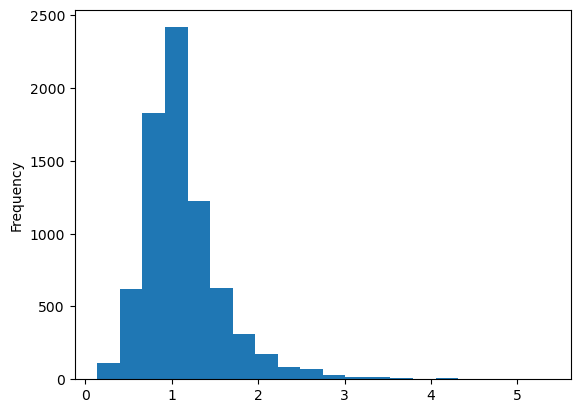

In [1054]:
pomer.plot.hist(bins=20)

In [1055]:
neutralita = pd.DataFrame(pomer).rename(columns={0:'cetnost'})
neutralita['odchylka'] = neutralita['cetnost'].apply(lambda x: x-1 if x>1 else 1-x)
neutralita.sort_values(by='odchylka').head(60)

,cetnost,odchylka
slova,,
jako,1.000000,0.000000
být,1.000000,0.000000
ale,1.000000,0.000000
když,1.000000,0.000000
překvapení,1.000108,0.000108
stékat,1.000108,0.000108
chlubit,1.000108,0.000108
vánek,1.000108,0.000108
zblízka,1.000108,0.000108


## Slova více používaná muži-spisovateli

In [1057]:
pomer.sort_values(ascending=False).head(25)

slova
Karlov        5.357100
vnitřnost     5.275932
krajský       5.113595
nalézt        4.696159
génius        4.667170
zásobník      4.626586
Cikán         4.626586
kabiny        4.626586
ministr       4.413520
vůdkyně       4.174363
aparát        4.109139
srovnání      4.109139
barokní       4.058409
střelec       4.058409
močit         4.058409
akademie      4.000432
puška         3.923129
bezedný       3.855488
poslanec      3.855488
vozidlo       3.826500
náklaďák      3.652568
investovat    3.652568
rozvážně      3.652568
hodnost       3.652568
přilba        3.652568
dtype: float64

In [1058]:
pomer[pomer.index.str.endswith('la')].sort_values()

slova
zabouchla        0.152190
snila            0.196375
opáčila          0.202920
netušila         0.205200
neuměla          0.234139
nesměla          0.236741
zahlédla         0.257223
lekla            0.263248
nastěhovala      0.276710
užívala          0.283145
schoulila        0.289886
nevzala          0.292205
nehodlala        0.292205
zamrkala         0.295157
nečekala         0.299041
upřela           0.317615
ptala            0.318216
ucítila          0.318429
zastrčila        0.332052
jedla            0.332052
nestihla         0.336762
ujišťovala       0.338201
odfrkla          0.347864
chystala         0.363121
naskočila        0.365257
oslovila         0.370550
zaváhala         0.370550
povzdychla       0.370550
vyjela           0.374622
ohlédla          0.374622
četla            0.376553
rozhlížela       0.382650
perla            0.387394
pokývala         0.405841
zakroutila       0.405841
užila            0.405841
váhala           0.405841
zadívala         0.413088
vyhrkl

## Slova více používaná ženami-spisovatelkami

Pleso vypadá spíš jako špatné lemma slova ples.

In [1061]:
(1 / pomer).sort_values(ascending=False).head(25)

slova
babi           7.227792
pleso          6.570720
zabouchla      6.570720
myčka          5.544045
ramínko        5.475600
podpatku       5.092308
snila          5.092308
opáčila        4.928040
netušila       4.873284
natahuje       4.722705
nakloní        4.599504
kadeřník       4.517370
culík          4.435236
rozebrat       4.312035
neuměla        4.270968
zamumlat       4.243590
nesměla        4.224034
slivovice      4.106700
zahlédla       3.887676
lekla          3.798697
večírky        3.778164
nastěhovala    3.613896
užívala        3.531762
schoulila      3.449628
uvolněně       3.449628
dtype: float64